Import libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from aladdin import getResponse
%matplotlib inline

Plotting data:

In [2]:
dict_, overall_percentage, daily_percentage = getResponse()
t = np.arange(len(daily_percentage))

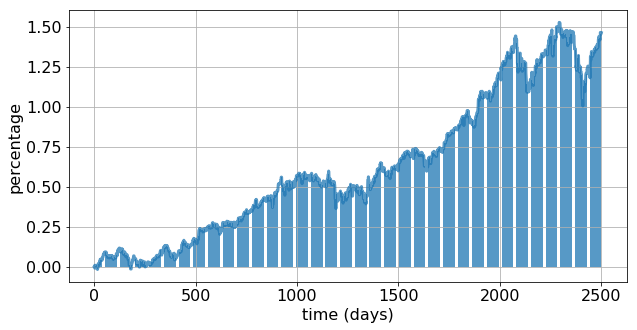

In [3]:
plt.figure(figsize = (10,5))
plt.rcParams.update({'font.size': 16})
plt.plot(t, overall_percentage, linewidth=3, alpha=0.75)
plt.bar(t, daily_percentage, alpha=0.75)
plt.xlabel('time (days)')
plt.ylabel('percentage')

plt.grid()